In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time 
import datetime
import collections
# from plotnine import *
import seaborn as sns
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

# Data loading

In [ ]:
y_train_2016 = pd.read_csv('/content/drive/MyDrive/SWE project/Dataset/OriginalDataset/train_2016_v2.csv')
X_train_2016 = pd.read_csv('/content/drive/MyDrive/SWE project/Dataset/OriginalDataset/properties_2016.csv')


print(f"\nX_train_2016 shape: {X_train_2016.shape}\ny_train_2016 shape: {y_train_2016.shape}")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



X_train_2016 shape: (2985217, 58)
y_train_2016 shape: (90275, 3)


# Exploratory data anaysis 

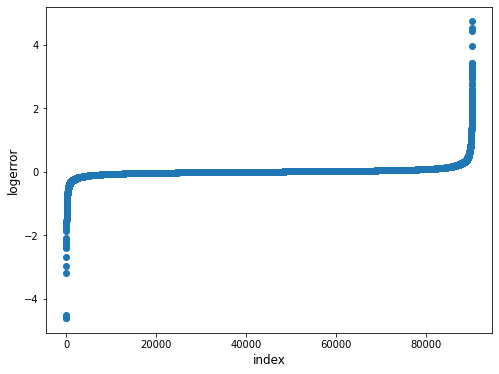

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(y_train_2016.shape[0]),np.sort(y_train_2016.logerror.values))
plt.xlabel('index',fontsize=12)
plt.ylabel('logerror',fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


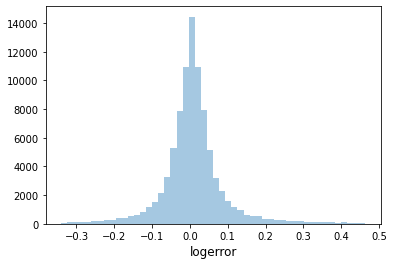

In [ ]:
# choose the max and min value 
logerror_max = np.percentile(y_train_2016.logerror.values, 99)
logerror_min = np.percentile(y_train_2016.logerror.values, 1)

y_train_2016 = y_train_2016[y_train_2016['logerror']<logerror_max]
y_train_2016 = y_train_2016[y_train_2016['logerror']>logerror_min]

sns.distplot(y_train_2016.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [ ]:
  train_2016 = pd.merge(y_train_2016, X_train_2016, how = 'left', on = 'parcelid')

In [ ]:
train_2016.shape

(88465, 60)

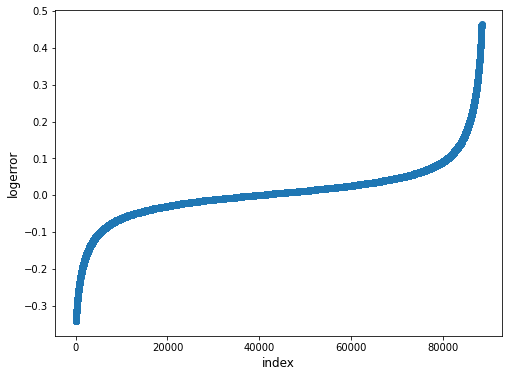

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_2016.shape[0]),np.sort(train_2016.logerror.values))
plt.xlabel('index',fontsize=12)
plt.ylabel('logerror',fontsize=12)
plt.show()

The value of 99 th and 1 st of logerror

#Reomving of missing data that has too much (95% missing value )

Display missingd ata

In [ ]:
all_data_na = (train_2016.isnull().sum() / len(train_2016)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data[:35]

,Missing Ratio
buildingclasstypeid,99.986435
finishedsquarefeet13,99.966088
basementsqft,99.953654
storytypeid,99.953654
yardbuildingsqft26,99.897134
fireplaceflag,99.751314
architecturalstyletypeid,99.707229
typeconstructiontypeid,99.664274
finishedsquarefeet6,99.559148
decktypeid,99.268637


In [ ]:
# looking at the missing rate
missing_df = train_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count']/train_2016.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
5,basementsqft,88424,0.999537
8,buildingclasstypeid,88453,0.999864
15,finishedsquarefeet13,88435,0.999661
43,storytypeid,88424,0.999537


This part could direclt delted since it has very high missing rate

In [ ]:
missing_df.loc[missing_df['missing_ratio'] > 0.95]

,column_name,missing_count,missing_ratio
4,architecturalstyletypeid,88206,0.997072
5,basementsqft,88424,0.999537
8,buildingclasstypeid,88453,0.999864
11,decktypeid,87818,0.992686
15,finishedsquarefeet13,88435,0.999661
16,finishedsquarefeet15,85121,0.962200
18,finishedsquarefeet6,88075,0.995591
24,hashottuborspa,86138,0.973696
30,poolsizesum,87506,0.989160
31,pooltypeid10,87320,0.987057


In [ ]:
train_2016.shape

(88465, 60)

In [ ]:
missing_df.head()

,column_name,missing_count,missing_ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,airconditioningtypeid,60089,0.679240
4,architecturalstyletypeid,88206,0.997072


Delte it from the original data ⚗

In [ ]:
deleteFeature = ['architecturalstyletypeid','basementsqft','buildingclasstypeid','decktypeid','finishedsquarefeet13','finishedsquarefeet15',
                 'finishedsquarefeet6','hashottuborspa','poolsizesum','pooltypeid10','pooltypeid2','storytypeid',
                 'typeconstructiontypeid','yardbuildingsqft17','yardbuildingsqft26','fireplaceflag','taxdelinquencyflag','taxdelinquencyyear']

In [ ]:
train_2016.drop(['architecturalstyletypeid','basementsqft','buildingclasstypeid','decktypeid','finishedsquarefeet13','finishedsquarefeet15',
                 'finishedsquarefeet6','hashottuborspa','poolsizesum','pooltypeid10','pooltypeid2','storytypeid',
                 'typeconstructiontypeid','yardbuildingsqft17','yardbuildingsqft26','fireplaceflag','taxdelinquencyflag','taxdelinquencyyear'],axis=1,inplace = True)

In [ ]:
train_2016.shape

(88465, 42)

In [ ]:
train_2016.shape

(88465, 42)

parcelid, transactiondate: This variable is not available when trying to predict target variable logerror




In [ ]:
train_2016.drop(['parcelid','transactiondate'],axis =1,inplace = True)

In [ ]:
train_2016.shape

(88465, 40)

In [ ]:
missing_df = train_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['featureName','count']
missing_df = missing_df.loc[missing_df['count'] > 0] 
missing_df = missing_df.sort_values(by='count')     

In [ ]:

missing_df['lossvalueRate'] = missing_df['count']/train_2016.shape[0]
missing_df

,featureName,count,lossvalueRate
37,landtaxvaluedollarcnt,1,0.000011
35,taxvaluedollarcnt,1,0.000011
21,propertycountylandusecode,1,0.000011
38,taxamount,6,0.000068
28,regionidzip,32,0.000362
34,structuretaxvaluedollarcnt,351,0.003968
39,censustractandblock,579,0.006545
7,calculatedfinishedsquarefeet,614,0.006941
32,yearbuilt,703,0.007947
5,calculatedbathnbr,1088,0.012299


We also need to know which feature only have unique value since only the feature who has unique value would have very low variance (0 variance )

Deal with category data 

Firstly we need to know the circumstance in the left dataset 

In [ ]:
train_2016.shape

(88465, 40)

In [ ]:
train_2016.head()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet50,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,0.0276,1.0,2.0,3.0,4.0,2.0,NaN,1684.0,1684.0,NaN,...,NaN,1.0,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,-0.1684,NaN,3.5,4.0,NaN,3.5,NaN,2263.0,2263.0,NaN,...,1.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,-0.0040,1.0,3.0,2.0,4.0,3.0,NaN,2217.0,2217.0,NaN,...,NaN,1.0,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,0.0218,1.0,2.0,2.0,4.0,2.0,NaN,839.0,839.0,NaN,...,NaN,1.0,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,-0.0050,NaN,2.5,4.0,NaN,2.5,NaN,2283.0,2283.0,NaN,...,1.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [ ]:
from pandas._libs.tslibs import dtypes
train_2016.dtypes

logerror                        float64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet50            float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
pooltypeid7                     float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64


There are two category data now ( propertycountylandusecode,propertyzoningdesc)

Cardinality of each feature

In [ ]:
AnalysisCardinalty = train_2016.copy()

In [ ]:
AnalysisCardinalty.drop(['logerror'],axis = 1,inplace = True)

In [ ]:
AnalysisCardinalty.nunique()

airconditioningtypeid               6
bathroomcnt                        22
bedroomcnt                         17
buildingqualitytypeid               8
calculatedbathnbr                  21
finishedfloor1squarefeet         1873
calculatedfinishedsquarefeet     5034
finishedsquarefeet12             4915
finishedsquarefeet50             1885
fips                                3
fireplacecnt                        5
fullbathcnt                        13
garagecarcnt                       13
garagetotalsqft                   859
heatingorsystemtypeid              12
latitude                        71871
longitude                       70449
lotsizesquarefeet               19727
poolcnt                             1
pooltypeid7                         1
propertycountylandusecode          71
propertylandusetypeid              13
propertyzoningdesc               1970
rawcensustractandblock          41949
regionidcity                      177
regionidcounty                      3
regionidneig

Curse of High demonality : since if we use one-hot encoder or any encoding algorithm :That is a totally diasdter .That is why I delete this feature and these two 

propertycountylandusecode          71
propertyzoningdesc  1970

propertylandusetypeid already provides similar information. In addition, this variable has over 2300 unique values - drastically increasing dataset cardinality

In [ ]:
train_2016.shape

(88465, 40)

In [ ]:
train_2016.drop(['propertycountylandusecode','propertyzoningdesc'],axis =1,inplace = True)

In [ ]:
train_2016.shape

(88465, 38)

In [ ]:
from pandas._libs.tslibs import dtypes
train_2016.dtypes

logerror                        float64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet50            float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
pooltypeid7                     float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64


In [ ]:
percent_missing = train_2016.isnull().sum() * 100 / len(train_2016)
missing_value_df = pd.DataFrame({'column_name': train_2016.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

,column_name,percent_missing
logerror,logerror,0.000000
bathroomcnt,bathroomcnt,0.000000
bedroomcnt,bedroomcnt,0.000000
assessmentyear,assessmentyear,0.000000
roomcnt,roomcnt,0.000000
regionidcounty,regionidcounty,0.000000
fips,fips,0.000000
rawcensustractandblock,rawcensustractandblock,0.000000
propertylandusetypeid,propertylandusetypeid,0.000000
longitude,longitude,0.000000


Unique value check and deletion

In [ ]:
print ("Features with one unique value!!")
exclude_unique = []
for c in train_2016.columns:
    num_uniques = len(train_2016[c].unique())
    if train_2016[c].isnull().sum() != 0:
        num_uniques -= 1
    if num_uniques == 1:
        exclude_unique.append(c)
print(exclude_unique)

Features with one unique value!!
['poolcnt', 'pooltypeid7', 'assessmentyear']


In [ ]:
train_2016['poolcnt'].value_counts()

1.0    17590
Name: poolcnt, dtype: int64

In [ ]:
train_2016['pooltypeid7'].value_counts()

1.0    16408
Name: pooltypeid7, dtype: int64

In [ ]:
train_2016['assessmentyear'].value_counts()

2015.0    88465
Name: assessmentyear, dtype: int64

Unique value would cost the imblance of data and variance is zero for continous type of feature and that is why i delte it .

In [ ]:
train_2016.drop(['poolcnt', 'pooltypeid7', 'assessmentyear'],axis = 1,inplace = True)

In [ ]:
train_2016.shape

(88465, 35)

Checking missing rate again

In [ ]:
percent_missing = train_2016.isnull().sum() * 100 / len(train_2016)
missing_value_df = pd.DataFrame({'column_name': train_2016.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

,column_name,percent_missing
logerror,logerror,0.000000
roomcnt,roomcnt,0.000000
regionidcounty,regionidcounty,0.000000
rawcensustractandblock,rawcensustractandblock,0.000000
propertylandusetypeid,propertylandusetypeid,0.000000
latitude,latitude,0.000000
fips,fips,0.000000
longitude,longitude,0.000000
bathroomcnt,bathroomcnt,0.000000
bedroomcnt,bedroomcnt,0.000000


In [ ]:
from google.colab import files
train_2016.to_csv('dataBeforeImputation.csv') 
files.download('dataBeforeImputation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drop candidate with missing too much in the table above 

# Imputation of data or Quality of impuatation of data

Now let's do the operation of imputation of data

In [ ]:
train_2016.shape

(88465, 35)

Mode Imputation Features

In [ ]:
train_2016.describe()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet50,...,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock
count,88465.000000,28376.000000,88465.000000,88465.000000,56055.000000,87377.000000,6765.000000,87851.000000,84087.000000,6765.000000,...,88465.000000,11886.000000,56974.000000,87762.000000,20259.000000,8.811400e+04,8.846400e+04,8.846400e+04,88459.000000,8.788600e+04
mean,0.009393,1.820130,2.280778,3.032454,5.552779,2.308743,1345.749741,1770.256309,1744.151272,1352.892239,...,1.488374,1.008077,1.106136,1968.799366,1.441976,1.795855e+05,4.554199e+05,2.765449e+05,5947.922597,6.049224e+13
std,0.083386,2.980406,0.993714,1.145993,1.898481,0.966886,642.081132,917.268991,900.114279,663.618677,...,2.827640,0.097605,0.798270,23.635516,0.544339,2.030236e+05,5.345213e+05,3.862271e+05,6598.412639,2.049689e+11
min,-0.341100,1.000000,0.000000,0.000000,1.000000,1.000000,44.000000,2.000000,2.000000,44.000000,...,0.000000,1.000000,1.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2.200000e+01,49.080000,6.037101e+13
25%,-0.025300,1.000000,2.000000,2.000000,4.000000,2.000000,938.000000,1186.000000,1174.000000,938.000000,...,0.000000,1.000000,1.000000,1953.000000,1.000000,8.190500e+04,2.006108e+05,8.299275e+04,2887.065000,6.037400e+13
50%,0.006000,1.000000,2.000000,3.000000,7.000000,2.000000,1244.000000,1540.000000,1519.000000,1247.000000,...,0.000000,1.000000,1.000000,1970.000000,1.000000,1.325970e+05,3.437035e+05,1.937535e+05,4550.540000,6.037620e+13
75%,0.038300,1.000000,3.000000,4.000000,7.000000,3.000000,1614.000000,2092.000000,2055.000000,1617.000000,...,0.000000,1.000000,1.000000,1987.000000,2.000000,2.106272e+05,5.400422e+05,3.450170e+05,6888.965000,6.059042e+13
max,0.463700,13.000000,20.000000,16.000000,12.000000,20.000000,6805.000000,22741.000000,18577.000000,8352.000000,...,18.000000,4.000000,143.000000,2015.000000,4.000000,7.838271e+06,2.650000e+07,2.450000e+07,311064.070000,6.111009e+13


In [ ]:
train_2016.isnull().sum()

logerror                            0
airconditioningtypeid           60089
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32410
calculatedbathnbr                1088
finishedfloor1squarefeet        81700
calculatedfinishedsquarefeet      614
finishedsquarefeet12             4378
finishedsquarefeet50            81700
fips                                0
fireplacecnt                    78980
fullbathcnt                      1088
garagecarcnt                    58865
garagetotalsqft                 58865
heatingorsystemtypeid           33501
latitude                            0
longitude                           0
lotsizesquarefeet               10018
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1771
regionidcounty                      0
regionidneighborhood            53301
regionidzip                        32
roomcnt                             0
threequarter

I used KNN imputation to fill with missing value 

No matter which stategy of imputation of missing and it does have pros and cons.We need to select the the less risker and more accuarcy method and we could also overcome the missing value strategy from the next step :Data transformation:https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

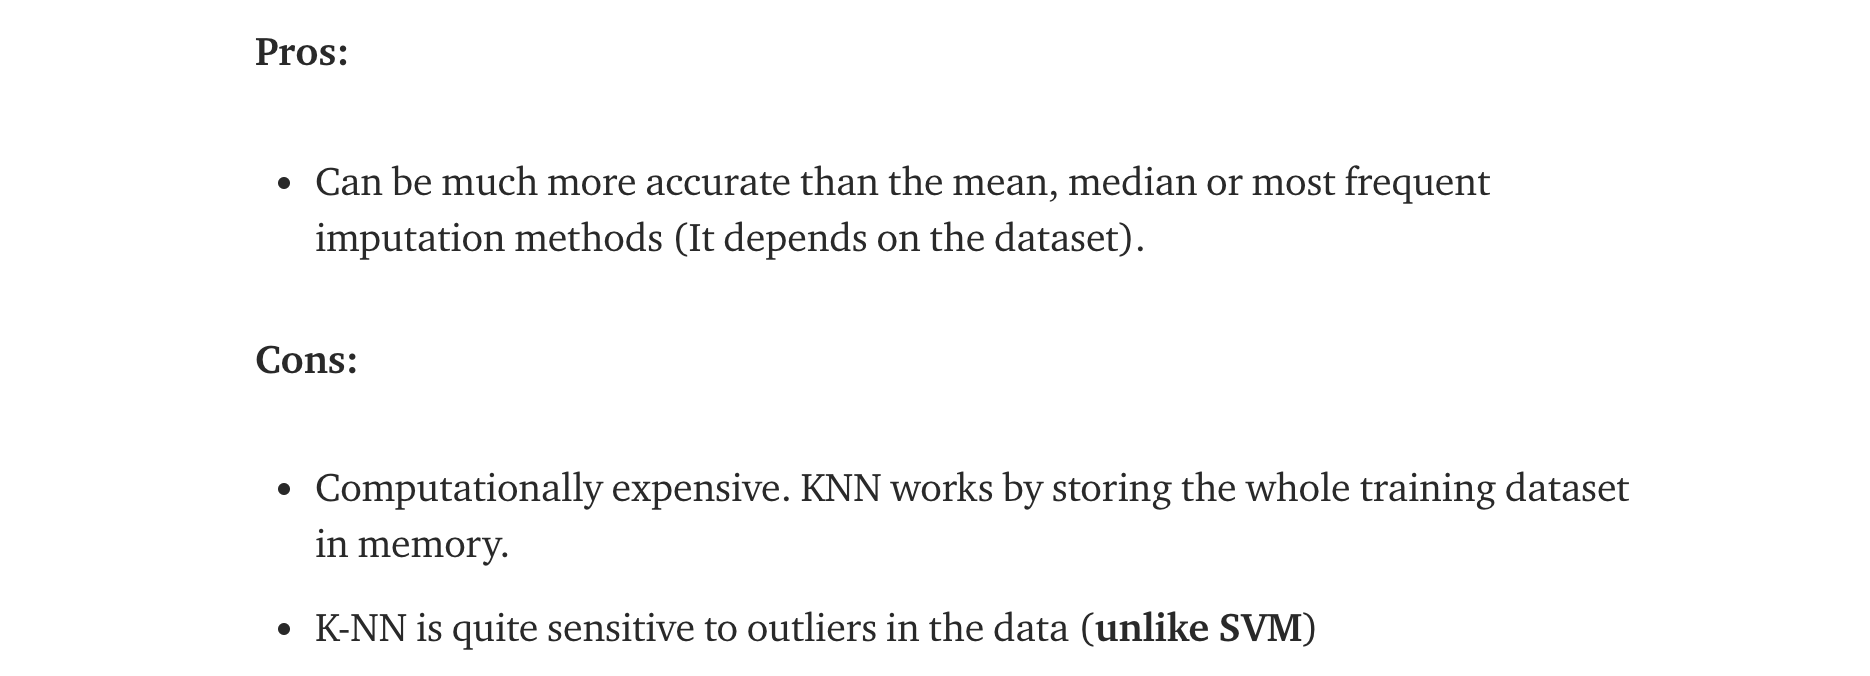

To deal with outiler ,I would do in the data transformation after imputation 

I need to be considerful about neighbour number in the approach 


Here we need to Cross vailidation to confirm the number of N

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [ ]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

Reference https://towardsdatascience.com/missing-value-imputation-with-python-and-k-nearest-neighbors-308e7abd273d

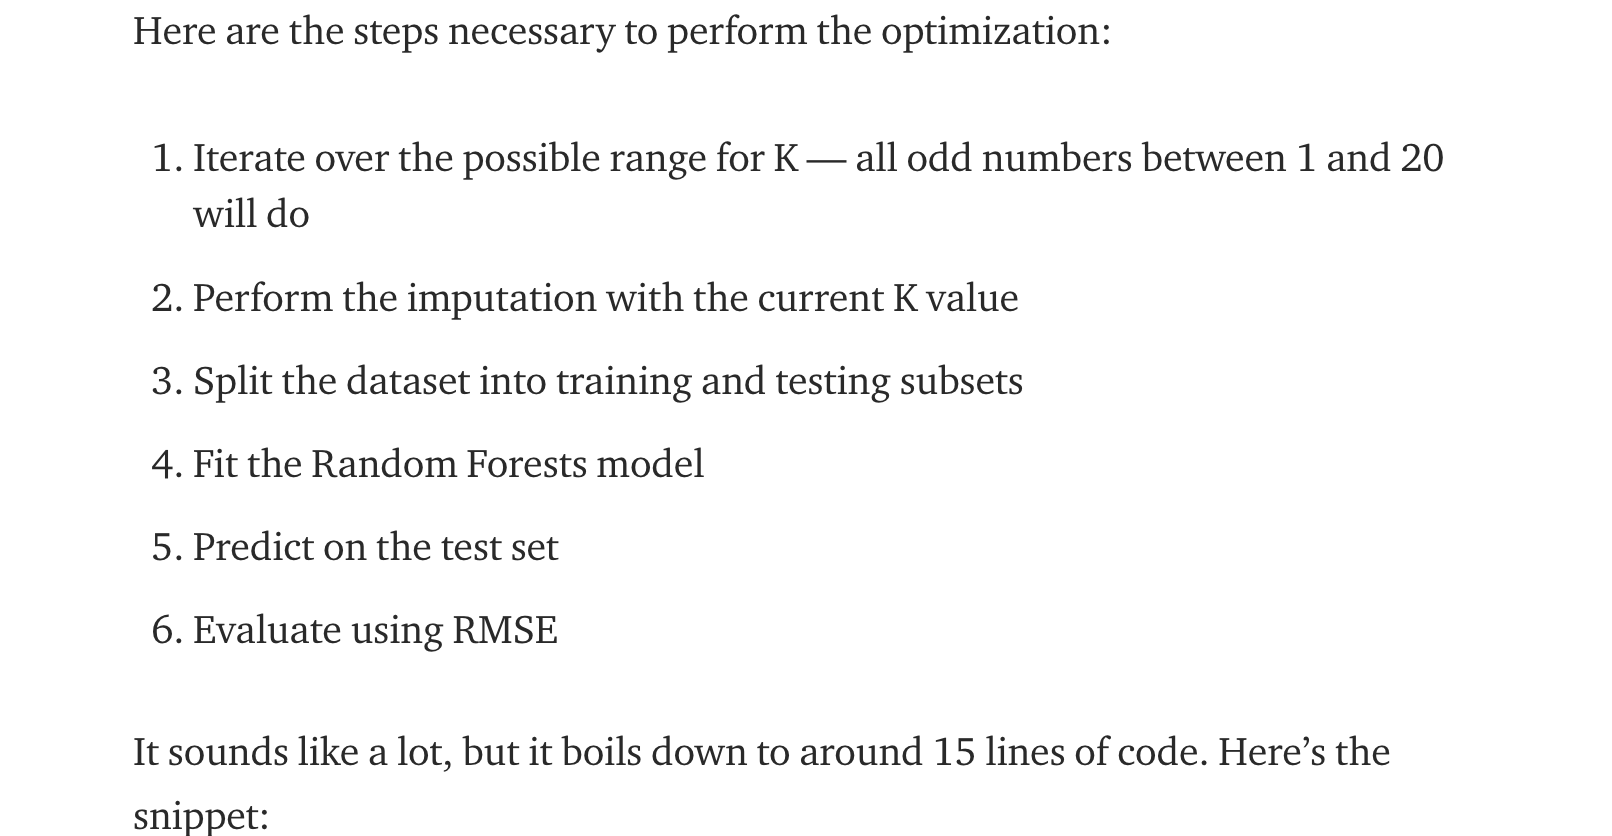

In [ ]:
train_2016  = pd.read_csv('/content/dataBeforeImputation.csv')

In [ ]:
train_2016.shape

(88465, 35)

Reloading again

In [ ]:
KImputerData = train_2016.copy()

In [ ]:
KImputerData.shape

(88465, 35)

In [ ]:
k_errors = optimize_k(data=KImputerData, target='logerror')

In [ ]:
k_errors

[{'K': 1, 'RMSE': 0.08349469677270165},
 {'K': 3, 'RMSE': 0.08356987318585693},
 {'K': 5, 'RMSE': 0.08344864419877694},
 {'K': 7, 'RMSE': 0.08342199366522376},
 {'K': 9, 'RMSE': 0.08331119897367502},
 {'K': 11, 'RMSE': 0.08315261375448944},
 {'K': 13, 'RMSE': 0.08320769043552168},
 {'K': 15, 'RMSE': 0.08312050817633174},
 {'K': 17, 'RMSE': 0.08328891415569029},
 {'K': 19, 'RMSE': 0.08327739501689879}]

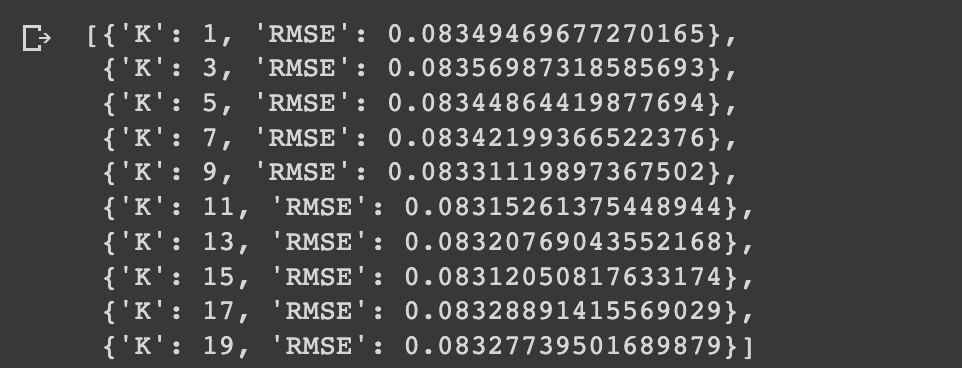

In [ ]:
import matplotlib.pyplot as plt
k = [1,3,5,7,9,11,13,15,17,19]

In [ ]:
rmse = [0.08349469677270165,0.08356987318585693,0.08344864419877694,0.08342199366522376
              ,0.08331119897367502,0.08315261375448944,0.08320769043552168,0.08312050817633174,
              0.08328891415569029,0.08327739501689879]

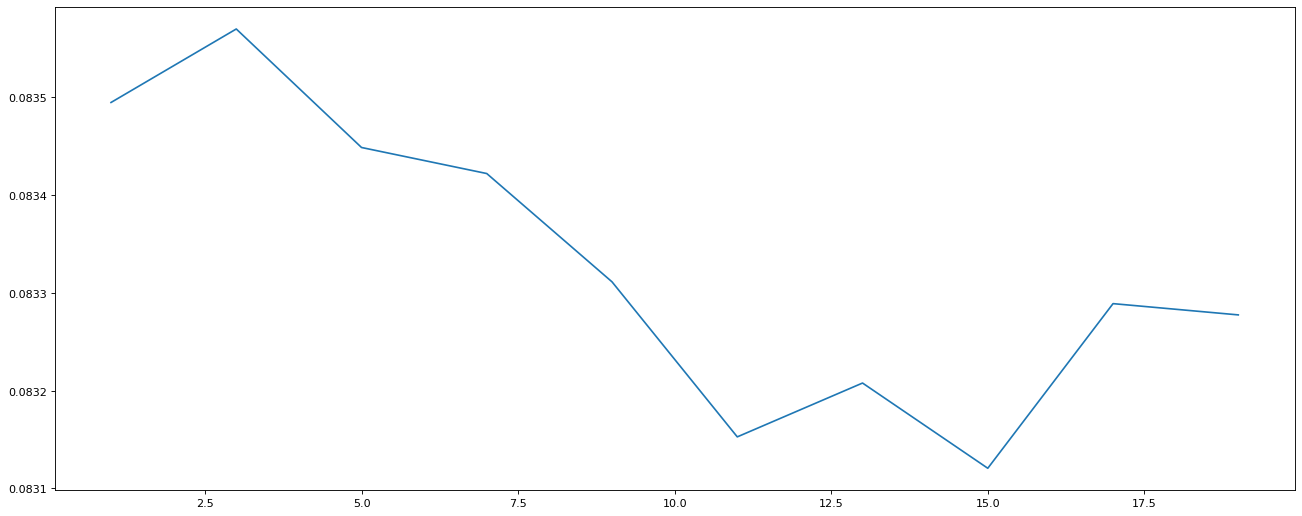

In [ ]:

plt.figure(figsize=(20, 8), dpi=80)


plt.plot(k, rmse)


plt.show()

3 Hours to find the optimal K 

From the graph above we could confirm the K number ,which need to have small RMSE and small K number as well. 15 is a good parameter 

Imputation now neighour_n = 15

In [ ]:
train_2016.shape

(88465, 35)

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=15)
imputed = imputer.fit_transform(train_2016)
df_imputed = pd.DataFrame(imputed, columns=train_2016.columns)

In [ ]:
df_imputed.isnull().sum()

logerror                        0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
finishedfloor1squarefeet        0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
finishedsquarefeet50            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidneighborhood            0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt                         0
yearbuilt                       0
numberofstorie

In [ ]:
#we need to save data here
from google.colab import files

In [ ]:
#we need to save data here
from google.colab import files
df_imputed.to_csv('dataAfterImputation.csv') 
files.download('dataAfterImputation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_imputed.shape

(88465, 35)

# Data transformation

we need to look at each feature with target variable to select different data transformation apporach (log,square root,exp ) 

#Feature engineering

# Data transformation

## log
## square root 

#Feature selection

## Random forest here 

## Grid Search/ Randomised Search for hyperparameter tuning

#Creating model -Linear regression

# Removal mulit-collinearity features via Variance inflation factor

#Analysis of variance